<a href="https://colab.research.google.com/github/Anum79/NLP/blob/main/BBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d pariza/bbc-news-summary

 79% 7.00M/8.91M [00:00<00:00, 13.8MB/s]
100% 8.91M/8.91M [00:00<00:00, 11.7MB/s]


In [ ]:
!unzip /content/bbc-news-summary.zip -d data_set

Streaming output truncated to the last 5000 lines.
  inflating: data_set/BBC News Summary/Summaries/sport/363.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/364.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/365.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/366.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/367.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/368.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/369.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/370.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/371.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/372.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/373.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/374.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/375.txt  
  inflating: data_set/BBC News Summary/Summaries/sport/376.txt  
  inflating: data_set/BBC News Summary/

In [ ]:
main_dir = '/content/data_set/BBC News Summary'

In [ ]:
import os
import time
import glob
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.listdir('../content/data_set/BBC News Summary')

['News Articles', 'Summaries']

In [ ]:
os.listdir('../content/data_set/BBC News Summary/Summaries')

['entertainment', 'politics', 'business', 'tech', 'sport']

In [ ]:
articles_path = '/content/data_set/BBC News Summary/News Articles'
summaries_path = '/content/data_set/BBC News Summary/Summaries'
categories_list = ['politics', 'sport', 'tech', 'entertainment', 'business']

In [ ]:
def read_files_from_folders(articles_path, summaries_path, cateogies_list = ['tech','sport'], encoding='ISO-8859-1'):
    articles = []
    summaries = []
    categories = []
    for category in categories_list:
        article_paths = glob.glob(os.path.join(articles_path, category, '*.txt'), recursive=True)
        summary_paths = glob.glob(os.path.join(summaries_path, category, '*.txt'), recursive=True)
        print(f'found {len(article_paths)} file in articles/{category}, {len(summary_paths)} file in summaries/{category}')

        if len(article_paths) != len(summary_paths):
            print('number of files is not equal')
            return
        for idx_file in range(len(article_paths)):
            categories.append(category)
            with open(article_paths[idx_file], mode = 'r', encoding = encoding) as file:
              articles.append(file.read())

            with open(summary_paths[idx_file], mode = 'r', encoding = encoding ) as file:
                summaries.append(file.read())

    print(f'total {len(articles)} file in articles folders, {len(summaries)} file in summaries folders')
    return articles, summaries, categories

In [ ]:
articles, summaries, categories = read_files_from_folders(articles_path, summaries_path, categories_list)

found 417 file in articles/politics, 417 file in summaries/politics
found 511 file in articles/sport, 511 file in summaries/sport
found 401 file in articles/tech, 401 file in summaries/tech
found 386 file in articles/entertainment, 386 file in summaries/entertainment
found 510 file in articles/business, 510 file in summaries/business
total 2225 file in articles folders, 2225 file in summaries folders


In [ ]:
df = pd.DataFrame({'articles': articles,'summaries': summaries, 'categories': categories})
df

,articles,summaries,categories
0,Brown ally rejects Budget spree\n\nChancellor ...,"But Mr Balls, a prospective Labour MP, said he...",politics
1,Citizenship event for 18s touted\n\nCitizenshi...,Britain's young black and Asian people are to ...,politics
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...,politics
3,UKIP could sue Veritas defectors\n\nThe UK Ind...,Mr Hockney said the law was clear that those e...,politics
4,MPs tout Lords replacement plan\n\nA group of ...,Their plan would see the House of Lords being ...,politics
...,...,...,...
2220,Absa and Barclays talks continue\n\nSouth Afri...,South Africa biggest retail bank Absa has said...,business
2221,Bargain calls widen Softbank loss\n\nJapanese ...,"The firm, a market leader in high-speed intern...",business
2222,Water firm Suez in Argentina row\n\nA conflict...,The government has rejected the 60% rise and w...,business
2223,Russia gets investment blessing\n\nSoaring oil...,"""These improvements are so significant that th...",business


In [ ]:
df.shape

(2225, 3)

In [ ]:
tags_values = df['categories'].value_counts()
tags_values

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: categories, dtype: int64

In [ ]:
from sklearn.pipeline import FeatureUnion

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.0 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
#MultinomialNB model pipeline
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [ ]:
#spliting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(df["articles"], df["categories"],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((1780,), (445,), (1780,))

In [ ]:
#model training
model = clf.fit(X_train,y_train)

In [ ]:
print("Accuracy of Naive Bayes Classifier is {}".format(model.score(X_test,y_test)))

Accuracy of Naive Bayes Classifier is 0.9662921348314607


In [ ]:
# Predict on Test data
y_predicted = model.predict(X_test)
y_predicted[0:10]

array(['politics', 'sport', 'entertainment', 'politics', 'tech',
       'entertainment', 'business', 'tech', 'sport', 'tech'], dtype='<U13')

In [ ]:
#decision tree model
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', DecisionTreeClassifier()),
    ])

In [ ]:
#model training
model = clf.fit(X_train,y_train)

In [ ]:
print("Accuracy of Decision tree is {}".format(model.score(X_test,y_test)))

Accuracy of Decision tree is 0.8269662921348314


In [ ]:
#Random forest classifier
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])

In [ ]:
#model training
model = clf.fit(X_train,y_train)

In [ ]:
print("Accuracy of Random forest is {}".format(model.score(X_test,y_test)))

Accuracy of Random forest is 0.9752808988764045


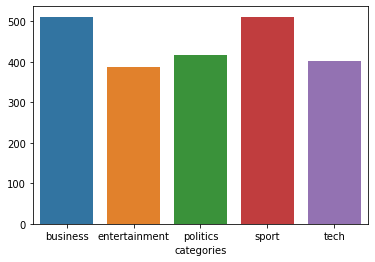

In [ ]:
category_sizes = df.groupby('categories').size()
sns.barplot(x=category_sizes.index, y=category_sizes)
plt.show()